# Background & Context

Employee Promotion means the ascension of an employee to higher ranks, this aspect of the job is what drives employees the most.
The ultimate reward for dedication and loyalty towards an organization and HR team plays an important role in handling all these promotion tasks based on ratings and other attributes available.

The HR team in JMD company stored data of promotion cycle last year, which consists of details of all the employees in the company working last year and also
if they got promoted or not, but every time this process gets delayed due to so many details available for each employee - it gets difficult to compare and decide.

So this time HR team wants to utilize the stored data to make a model, that will predict if a person is eligible for promotion or not.

You as a data scientist at JMD company, need to come up with a model that will help the HR team to predict if a person is eligible for promotion or not.

# Objective

Explore and visualize the dataset.
Build a classification model to predict if the customer has a higher probability of getting a promotion.
Optimize the model using appropriate techniques.
Generate a set of insights and recommendations that will help the company.

# Data Dictionary

- employee_id: Unique ID for employee
- department: Department of employee
- region: Region of employment (unordered)
- education: Education Level
- gender: Gender of Employee
- recruitment_channel: Channel of recruitment for employee
- no_ of_ trainings: no of other trainings completed in previous year on soft skills, technical skills etc.
- age: Age of Employee
- previous_ year_ rating: Employee Rating for the previous year
- length_ of_ service: Length of service in years
- awards_ won: if awards won during previous year then 1 else 0
- avg_ training_ score: Average score in current training evaluations
- is_promoted: (Target) Recommended for promotion

# Submission Guidelines

There are two parts to the submission: 
1. A well commented Jupyter notebook [format - .ipynb]
1. A submission in html format
Any assignment found copied/ plagiarized with other groups will not be graded and awarded zero marks
Please ensure timely submission as any submission post-deadline will not be accepted for evaluation

Submission will not be evaluated if:
1. it is submitted post-deadline, or,
1. more than 2 files are submitted

Happy Learning!!


# Scoring Guide


Perform an Exploratory Data Analysis on the data. Points: 6
- Univariate analysis
- Bivariate analysis
- Use appropriate visualizations to identify the patterns and insights
- Any other exploratory deep dive



Illustrate the insights based on EDA. Points: 5
- Key meaningful observations on the relationship between variables



Data Pre-processing. Points: 6
- Prepare the data for analysis
- Missing value Treatment
- Outlier Detection(treat, if needed- why or why not )
- Feature Engineering
- Prepare data for modeling



Model building - Logistic Regression. Points: 6
- Make a logistic regression model
- Improve model performance by up and downsampling the data
- Regularize above models, if required



Model building - Bagging and Boosting. Points: 9
- Build Decision tree, random forest, bagging classifier models
- Build Xgboost, AdaBoost, and gradient boosting models



Hyperparameter tuning using grid search. Points: 9
- Tune all the models using grid search
- Use pipelines in hyperparameter tuning



Hyperparameter tuning using random search. Points: 9
- Tune all the models using ramdonized search
- Use pipelines in hyperparameter tuning



Model Performances. Points: 5
- Compare the model performance of all the models
- Comment on the time taken by the grid and randomized search in optimization



Actionable Insights & Recommendations. Points: 5
- Business recommendations and insights



Total Points: 60

# Import Packages and Dataset

In [254]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, KFold

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error

In [195]:
df = pd.read_csv('employee_promotion.csv')
version_dict = {0: 'df'}
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0


### Insights
- region will need to be transformed into just the integer value
- will need to transform department, education, gender, and recruitment_channel
    - department and recruitement_channel can be transformed with one-hot encoding
    - education can be transformed using dictionary by listing sequential education degrees
    - gender can be transformed into binary

# EDA

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54808 non-null  int64  
 11  avg_training_score    52248 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 5.4+ MB


### Insights
- seem to have some null values in the following:
    - education
    - previous_year_rating
    - avg_training_score
- mix of string (object) and numbers (int64 & float64)

In [197]:
unique = df.nunique() # get number of unique values
null = df.isnull().sum() # get number of null values
count = df.count() # get total count
percent_null = (null/count*100).round(2) # calculate percent of null values 

df_uncp = pd.concat([unique, null, count, percent_null], axis=1) # concatenate all variables above
df_uncp.columns = ['unique', 'null', 'count', 'percent_null'] # name columns

df_uncp # df unique, null, count, percent

,unique,null,count,percent_null
employee_id,54808,0,54808,0.00
department,9,0,54808,0.00
region,34,0,54808,0.00
education,3,2409,52399,4.60
gender,2,0,54808,0.00
recruitment_channel,3,0,54808,0.00
no_of_trainings,10,0,54808,0.00
age,41,0,54808,0.00
previous_year_rating,5,4124,50684,8.14
length_of_service,35,0,54808,0.00


In [198]:
print('dupes: ', df.duplicated().sum())

dupes:  0


In [199]:
print('total percent null: ', df_uncp['percent_null'].sum())

total percent null:  17.64


### Insights
- no duplicates
- 17.64% of the rows are null. nearly 1/5th!
- transforming department, education, and recruitment_channel should not be a problem
    - department has 9 unique values
    - education only has 3 unique values
    - recruitement_channel also only has 3 unique values
- confirmed null values on the following:
    - education
        - can't take the median, median, or mode
        - perhaps could try seeing what other related columns have for a value in education; ex: department, age, length_of_service
    - previous_year_rating
    - avg_training_score
- 34 regions

# Address Null Values

In [200]:
# get a snapshot of all columns where education is null
df[df.education.isna() == True]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
10,29934,Technology,region_23,NaN,m,sourcing,1,30,NaN,1,0,77.0,0
21,33332,Operations,region_15,NaN,m,sourcing,1,41,4.0,11,0,57.0,0
32,35465,Sales & Marketing,region_7,NaN,f,sourcing,1,24,1.0,2,0,48.0,0
43,17423,Sales & Marketing,region_2,NaN,m,other,3,24,2.0,2,0,48.0,0
82,66013,Sales & Marketing,region_2,NaN,m,sourcing,2,25,3.0,2,0,53.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54692,14821,Sales & Marketing,region_2,NaN,f,sourcing,1,35,3.0,7,0,53.0,0
54717,7684,Analytics,region_2,NaN,m,sourcing,1,32,3.0,4,0,86.0,0
54729,1797,HR,region_2,NaN,f,other,1,28,3.0,2,0,53.0,0
54742,38935,Sales & Marketing,region_31,NaN,m,other,1,28,4.0,3,0,47.0,0


/Users/ivansaucedo/opt/anaconda3/envs/aiml/lib/python3.8/site-packages/seaborn/axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


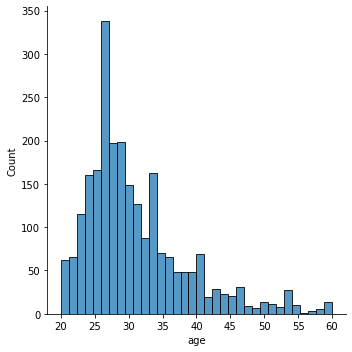

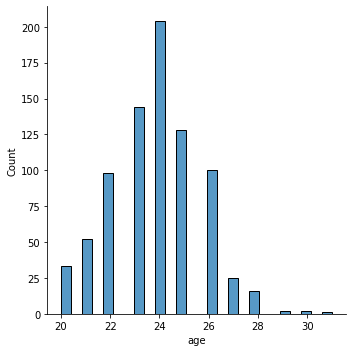

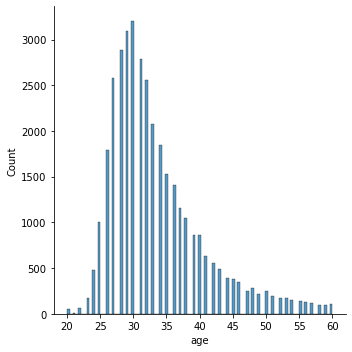

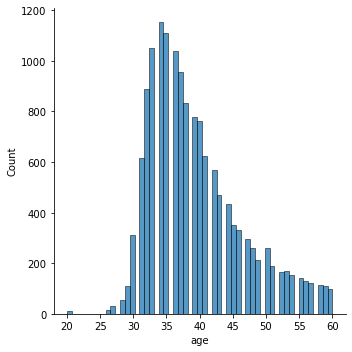

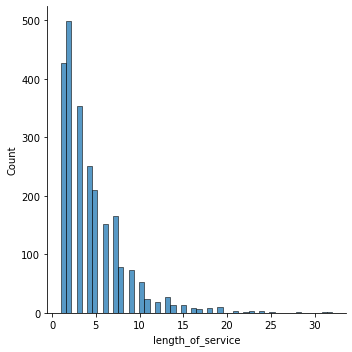

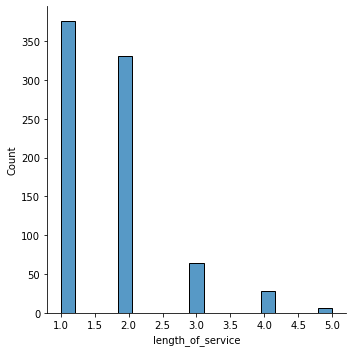

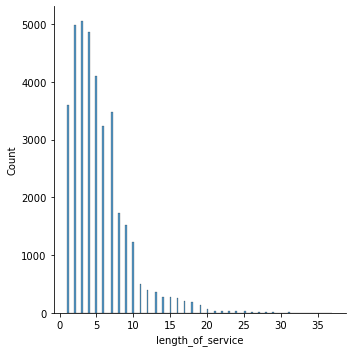

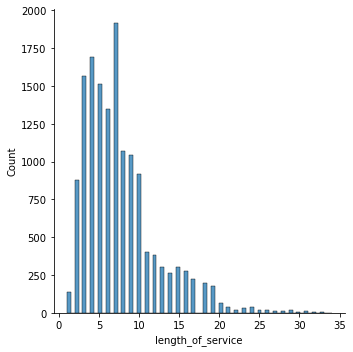

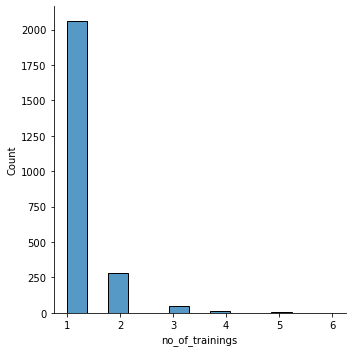

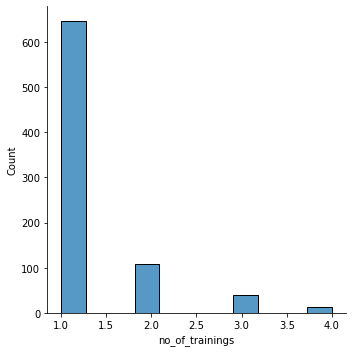

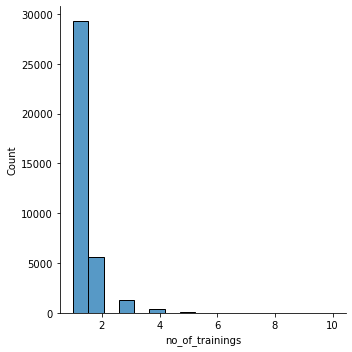

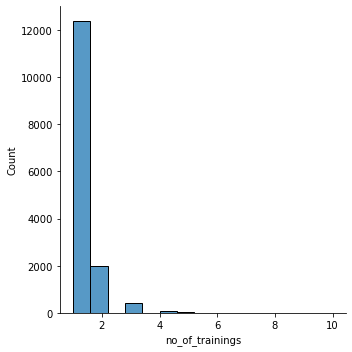

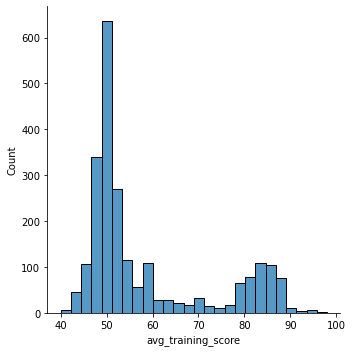

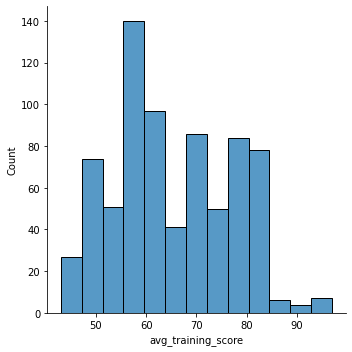

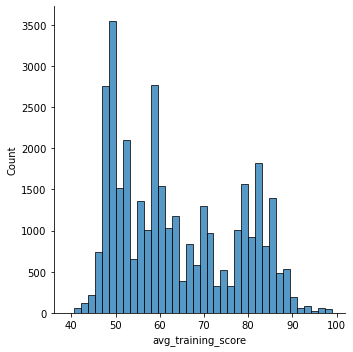

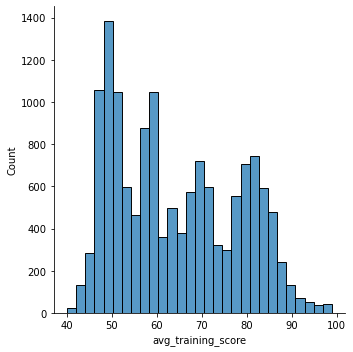

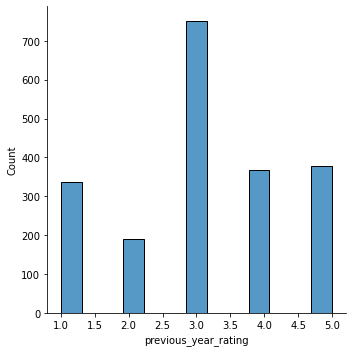

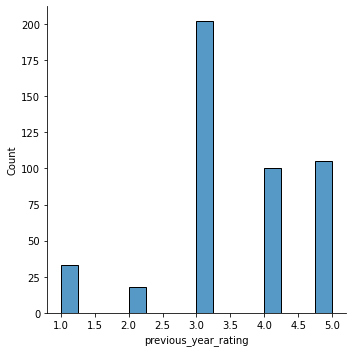

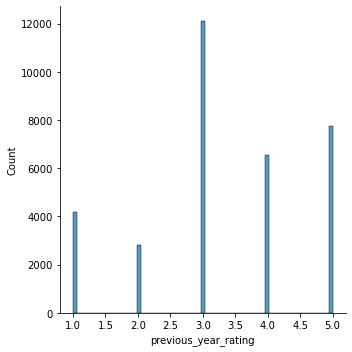

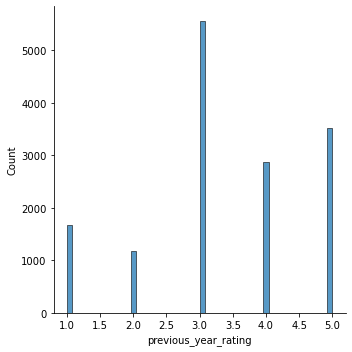

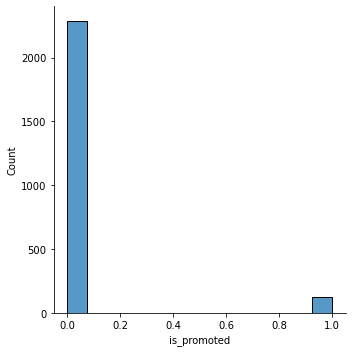

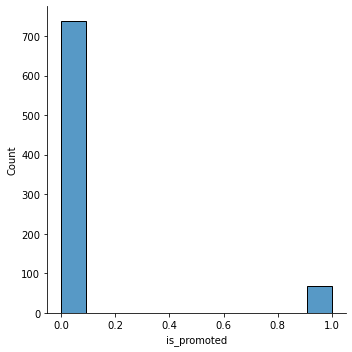

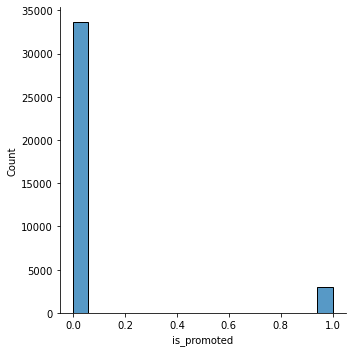

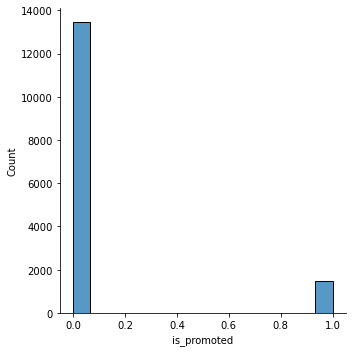

In [201]:
# iterate through selected columns and print displot of all 4 education values to compare to each other
edu_nan_cols = ['age', 'length_of_service', 'no_of_trainings', 'avg_training_score', 'previous_year_rating', 'is_promoted']
for col in edu_nan_cols:
    sns.displot(df[col][df.education.isna() == True])
    sns.displot(df[col][df.education == 'Below Secondary'])
    sns.displot(df[col][df.education == 'Bachelor\'s']) 
    sns.displot(df[col][df.education == 'Master\'s & above'])

### Insights
- I initially thought NAN in education could simply mean that the employee has no college degree, however, Below Seconday clearly designates this situation. 
- It is not clear what other categoy NAN should be instead; whether it should have been Below Secondary, Bachelor's, or Master's is not clearly evident. 
- Since it is such a small percantage of the dataset, 4.60%, I will simply be dropping all education NAN's. 
- For previous_year_rating and avg_training_score, I will use the average of the column. 

In [202]:
# drop null values in education column & create new revision; df drop na v01
df_dna = df.copy()
version_dict[1] = 'df_dna'
df_dna.dropna(subset=['education'], inplace=True)
df_dna

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54802,6915,Sales & Marketing,region_14,Bachelor's,m,other,2,31,1.0,2,0,49.0,0
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78.0,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56.0,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79.0,0


In [203]:
# replace null values with average in previous_year_rating columns
df_dna.previous_year_rating.fillna(df_dna.previous_year_rating.mean(), inplace=True)

In [204]:
# replace null values with average in avg_training_score columns
df_dna.avg_training_score.fillna(df_dna.avg_training_score.mean(), inplace=True)

In [205]:
# confirm no null values
df_dna.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won              0
avg_training_score      0
is_promoted             0
dtype: int64

# Transform Categorical Columns

In [206]:
# extract only the number from the region string using regex & create new revision: df transform categorical v02
df_tcat = df_dna.copy()
version_dict[2] = 'df_tcat'
df_tcat.region = df_tcat.region.str.extract('(\d+)')
df_tcat

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54802,6915,Sales & Marketing,14,Bachelor's,m,other,2,31,1.0,2,0,49.0,0
54803,3030,Technology,14,Bachelor's,m,sourcing,1,48,3.0,17,0,78.0,0
54804,74592,Operations,27,Master's & above,f,other,1,37,2.0,6,0,56.0,0
54805,13918,Analytics,1,Bachelor's,m,other,1,27,5.0,3,0,79.0,0


In [207]:
# transform gender into binary
gender = {'m': 1,'f': 0}
df_tcat.gender = [gender[item] for item in df_tcat.gender]
df_tcat

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,7,Master's & above,0,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,22,Bachelor's,1,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,19,Bachelor's,1,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,23,Bachelor's,1,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,26,Bachelor's,1,other,1,45,3.0,2,0,73.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54802,6915,Sales & Marketing,14,Bachelor's,1,other,2,31,1.0,2,0,49.0,0
54803,3030,Technology,14,Bachelor's,1,sourcing,1,48,3.0,17,0,78.0,0
54804,74592,Operations,27,Master's & above,0,other,1,37,2.0,6,0,56.0,0
54805,13918,Analytics,1,Bachelor's,1,other,1,27,5.0,3,0,79.0,0


In [208]:
# get the unique values in the education column
df_tcat.education.unique()

array(["Master's & above", "Bachelor's", 'Below Secondary'], dtype=object)

In [209]:
# convert education into sequential tier/rank order
edu = {'Below Secondary': 1,'Bachelor\'s': 2, 'Master\'s & above':3}
df_tcat.education = [edu[item] for item in df_tcat.education]
df_tcat.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,7,3,0,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,22,2,1,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,19,2,1,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,23,2,1,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,26,2,1,other,1,45,3.0,2,0,73.0,0


In [210]:
# get the unique values in the recruitment_channel column
df_tcat.recruitment_channel.unique()

array(['sourcing', 'other', 'referred'], dtype=object)

In [211]:
# one-hot encoding of recruitment_channel & create new revision: df one hot encoding v03
df_ohe = pd.get_dummies(df_tcat, columns=['recruitment_channel'])
version_dict[3] = 'df_ohe'
df_ohe.head()

,employee_id,department,region,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,65438,Sales & Marketing,7,3,0,1,35,5.0,8,0,49.0,0,0,0,1
1,65141,Operations,22,2,1,1,30,5.0,4,0,60.0,0,1,0,0
2,7513,Sales & Marketing,19,2,1,1,34,3.0,7,0,50.0,0,0,0,1
3,2542,Sales & Marketing,23,2,1,2,39,1.0,10,0,50.0,0,1,0,0
4,48945,Technology,26,2,1,1,45,3.0,2,0,73.0,0,1,0,0


In [212]:
# get the unique values in the department column
df_ohe.department.unique()

array(['Sales & Marketing', 'Operations', 'Technology', 'Analytics',
       'R&D', 'Procurement', 'Finance', 'HR', 'Legal'], dtype=object)

In [213]:
# one-hot encoding of department
df_ohe = pd.get_dummies(df_ohe, columns=['department'])
df_ohe.head()

,employee_id,region,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,...,recruitment_channel_sourcing,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology
0,65438,7,3,0,1,35,5.0,8,0,49.0,...,1,0,0,0,0,0,0,0,1,0
1,65141,22,2,1,1,30,5.0,4,0,60.0,...,0,0,0,0,0,1,0,0,0,0
2,7513,19,2,1,1,34,3.0,7,0,50.0,...,1,0,0,0,0,0,0,0,1,0
3,2542,23,2,1,2,39,1.0,10,0,50.0,...,0,0,0,0,0,0,0,0,1,0
4,48945,26,2,1,1,45,3.0,2,0,73.0,...,0,0,0,0,0,0,0,0,0,1


# Transform DTypes

In [21]:
df_ohe.dtypes

employee_id                       int64
region                           object
education                         int64
gender                            int64
no_of_trainings                   int64
age                               int64
previous_year_rating            float64
length_of_service                 int64
awards_won                        int64
avg_training_score              float64
is_promoted                       int64
recruitment_channel_other         uint8
recruitment_channel_referred      uint8
recruitment_channel_sourcing      uint8
department_Analytics              uint8
department_Finance                uint8
department_HR                     uint8
department_Legal                  uint8
department_Operations             uint8
department_Procurement            uint8
department_R&D                    uint8
department_Sales & Marketing      uint8
department_Technology             uint8
dtype: object

In [216]:
# transform region column into int64 type
df_ohe.region = df_ohe.region.astype('int64')
df_ohe.dtypes

employee_id                       int64
region                            int64
education                         int64
gender                            int64
no_of_trainings                   int64
age                               int64
previous_year_rating            float64
length_of_service                 int64
awards_won                        int64
avg_training_score              float64
is_promoted                       int64
recruitment_channel_other         uint8
recruitment_channel_referred      uint8
recruitment_channel_sourcing      uint8
department_Analytics              uint8
department_Finance                uint8
department_HR                     uint8
department_Legal                  uint8
department_Operations             uint8
department_Procurement            uint8
department_R&D                    uint8
department_Sales & Marketing      uint8
department_Technology             uint8
dtype: object

In [217]:
# transform all uint8-type columns with int64
for col in df_ohe.columns:
    if df_ohe[col].dtype == 'uint8':
#         print(col)
        df_ohe[col] = df_ohe[col].astype('int64')

In [218]:
df_ohe.dtypes

employee_id                       int64
region                            int64
education                         int64
gender                            int64
no_of_trainings                   int64
age                               int64
previous_year_rating            float64
length_of_service                 int64
awards_won                        int64
avg_training_score              float64
is_promoted                       int64
recruitment_channel_other         int64
recruitment_channel_referred      int64
recruitment_channel_sourcing      int64
department_Analytics              int64
department_Finance                int64
department_HR                     int64
department_Legal                  int64
department_Operations             int64
department_Procurement            int64
department_R&D                    int64
department_Sales & Marketing      int64
department_Technology             int64
dtype: object

# EDA, cont.

In [25]:
df_describe = pd.concat([df_ohe.describe().T, df_ohe.skew().round(3)], axis=1) # concatenate df_ohe.describe and df_ohe.skew, round skew to 3 decimal places
df_describe['mean'] = df_describe['mean'].round(1) # round mean to 1 decimal place
df_describe['std'] = df_describe['std'].round(2) # round std to 2 decimal places
df_describe.rename(columns = {'50%':'median'}, inplace = True) # rename 50% 
df_describe.rename(columns = {0:'skew'}, inplace = True) # rename skew
df_describe = df_describe.loc[:, ['mean', 'median', 'skew', 'std', 'min', 'max']] # recreate dataframe only with selected values
df_describe.iloc[4:11,:] # print only selected columns

,mean,median,skew,std,min,max
no_of_trainings,1.3,1.0,3.436,0.61,1.0,10.0
age,35.0,33.0,1.014,7.62,20.0,60.0
previous_year_rating,3.3,3.0,-0.327,1.21,1.0,5.0
length_of_service,5.9,5.0,1.728,4.28,1.0,37.0
awards_won,0.0,0.0,6.339,0.15,0.0,1.0
avg_training_score,64.0,62.0,0.404,13.13,39.0,99.0
is_promoted,0.1,0.0,2.936,0.28,0.0,1.0


### Pre-Graph  Insights
- no_of_trainings
     - mean > median = positive skewness
- age
    - mean > median = positive skewness
- previous_year_rating
     - mean > median. should be positive skewness, but skew column shows negative, near 0. interesting!
- lenght_of_service
    - mean > median = positive skewness
- awards_won
    - mean = median. should be symmetrical distribution, but skew column shows high positive skewness. interesting!
- avg_training_score
    - mean > median = positive skewness
- is_promoted
    - mean > median = positive skewness

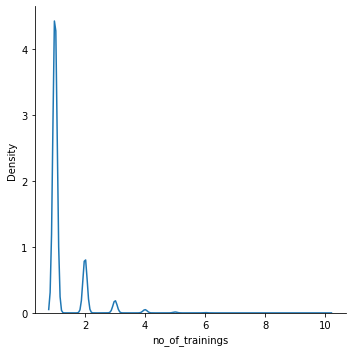

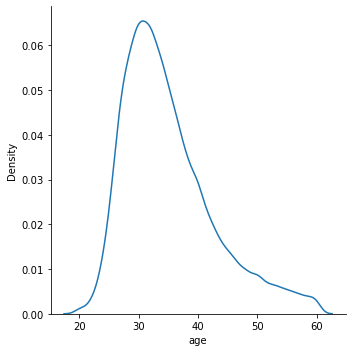

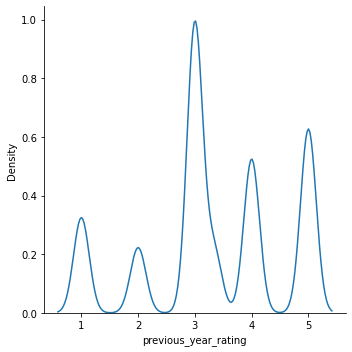

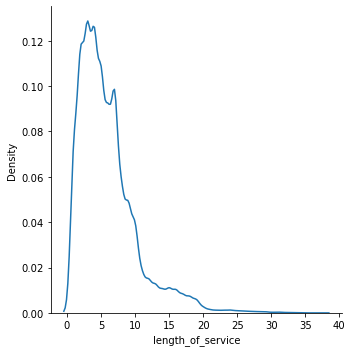

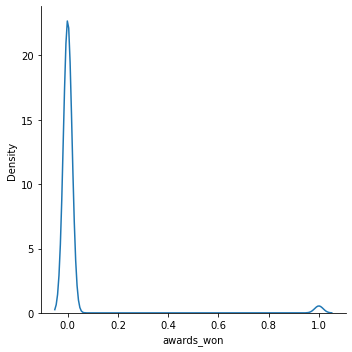

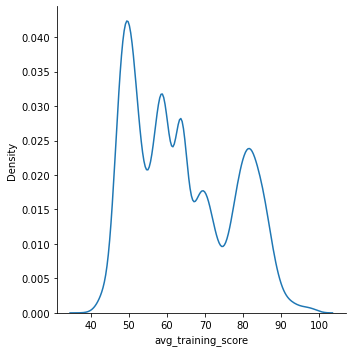

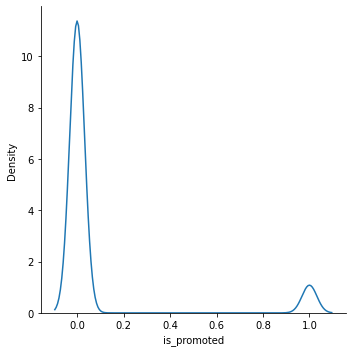

In [26]:
for col in df_ohe.columns[4:11]: # iterate through each column in the list of columns: df_ohe.columns[4:11]
    sns.displot(df_ohe[col], kind="kde") # print displot of of selected columns

### Post-Graph Insights
- no_of_trainings
     - positive skewness confirmed. most employees have had 1 training. 
- age
    - positive skewness confirmed. most employees are in their 30's. 
- previous_year_rating
     - most received a previously rating of 3
- lenght_of_service
    - most employees have been employed between 0-5 years.
- awards_won
    - most employees have won 0 awards. 
- avg_training_score
    - positive skewness confirmed. most employees have not received passing training scores (assumption: 70 = passing). 
- is_promoted
    - positive skewness confirmed. most employees were not promoted. 
- will take logarithm of following features:
    - no_of_trainings
    - age
    - length_of_service
    - avg_trainig_score

In [27]:
# view quantiles from 0 to 100% for selected columns
from numpy import arange

df_quantiles = df_ohe.describe(percentiles=[i for i in arange(.1,1, 0.1)]).T
df_quantiles = df_quantiles.iloc[1:,3:15] 
df_quantiles.iloc[3:10,:]

,min,10%,20%,30%,40%,50%,60%,70%,80%,90%,max
no_of_trainings,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,2.0,10.0
age,20.0,27.0,29.0,30.0,32.0,33.0,35.000000,37.0,40.0,46.0,60.0
previous_year_rating,1.0,1.0,3.0,3.0,3.0,3.0,3.337526,4.0,5.0,5.0,5.0
length_of_service,1.0,2.0,3.0,3.0,4.0,5.0,6.000000,7.0,8.0,11.0,37.0
awards_won,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0
avg_training_score,39.0,48.0,51.0,54.0,58.0,62.0,65.000000,71.0,79.0,83.0,99.0
is_promoted,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0


### Quantile Insights
- data nearly perfectly confirms above insights

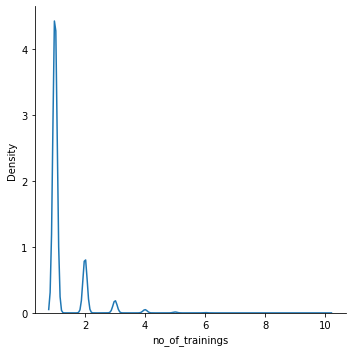

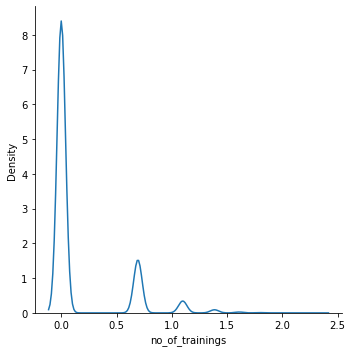

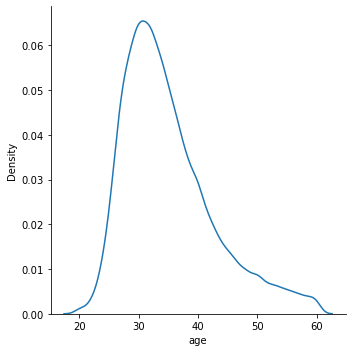

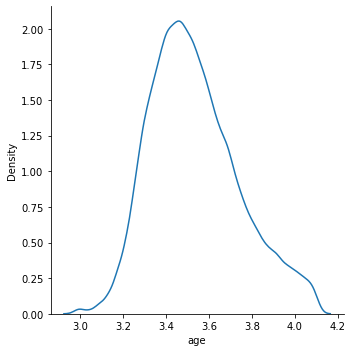

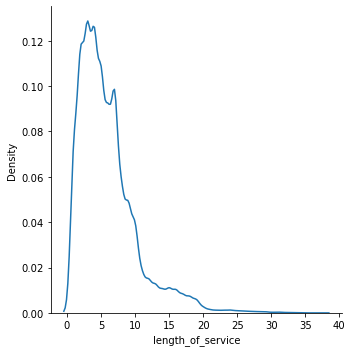

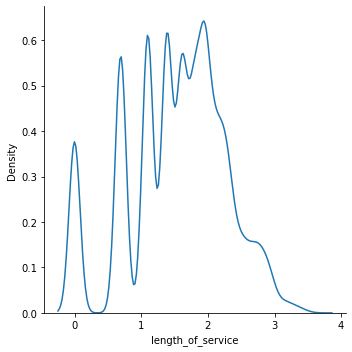

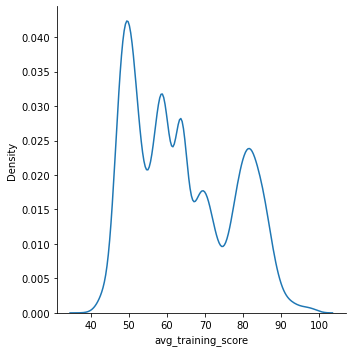

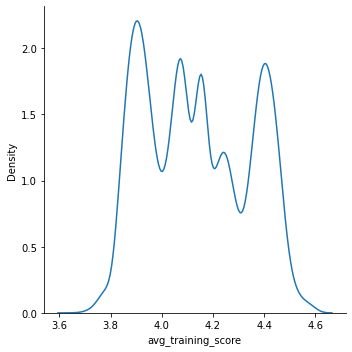

In [28]:
log_cols = ['no_of_trainings', 'age', 'length_of_service', 'avg_training_score'] # list of columns to take logarithm
for col in log_cols:
    sns.displot(df_ohe[col], kind="kde") # print original displot
    sns.displot(np.log(df_ohe[col]), kind="kde") # print displot after taking logarithm of columns 
#     print('red wine, success! ', col)

In [29]:
# compare skew before and after applying logarithm
skew = [[df_ohe.no_of_trainings.skew(), np.log(df_ohe.no_of_trainings).skew()]]
skew.append([df_ohe.age.skew(), np.log(df_ohe.age).skew()])
skew.append([df_ohe.length_of_service.skew(), np.log(df_ohe.length_of_service).skew()])
skew.append([df_ohe.avg_training_score.skew(), np.log(df_ohe.avg_training_score).skew()])
df_skew = pd.DataFrame(skew, columns=['skew', 'log skew'], index=['no_of_trainings', 'age', 'length_of_service','avg_training_score'])
df_skew

,skew,log skew
no_of_trainings,3.435561,2.034291
age,1.013941,0.499550
length_of_service,1.727902,-0.302036
avg_training_score,0.403527,0.165607


In [219]:
# iterate through log_cols defined above and apply logarithm 
for col in log_cols:
    df_ohe[col] = np.log(df_ohe[col])
#     print('red wine, success! ', col)

In [220]:
# confirm skew was transformed
df_ohe.skew()[log_cols]

no_of_trainings       2.034291
age                   0.499550
length_of_service    -0.302036
avg_training_score    0.165607
dtype: float64

# Bi-variate Analysis

In [32]:
df_ohe.columns

Index(['employee_id', 'region', 'education', 'gender', 'no_of_trainings',
       'age', 'previous_year_rating', 'length_of_service', 'awards_won',
       'avg_training_score', 'is_promoted', 'recruitment_channel_other',
       'recruitment_channel_referred', 'recruitment_channel_sourcing',
       'department_Analytics', 'department_Finance', 'department_HR',
       'department_Legal', 'department_Operations', 'department_Procurement',
       'department_R&D', 'department_Sales & Marketing',
       'department_Technology'],
      dtype='object')

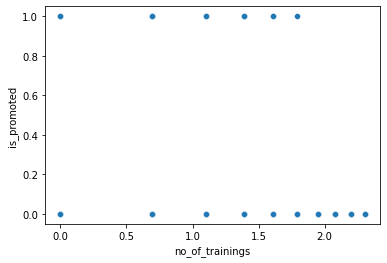

In [221]:
sns.scatterplot(x='no_of_trainings', y='is_promoted', data=df_ohe)
plt.show()

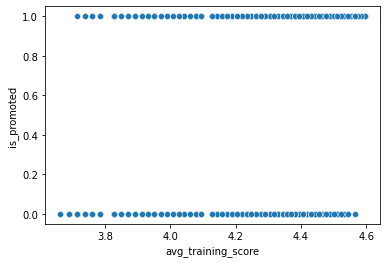

In [222]:
sns.scatterplot(x='avg_training_score', y='is_promoted', data=df_ohe)
plt.show()

### Insights
- no_of_trainings has a negative correlation with is_promoted
- avg_trainings_score, however, has a positive correlation with is_promoted
- overall, the takeaway seems to be: taking more trainings does not necessarily mean a promotion, but scoring higher in the training does help the employees' chances. 

<AxesSubplot:>

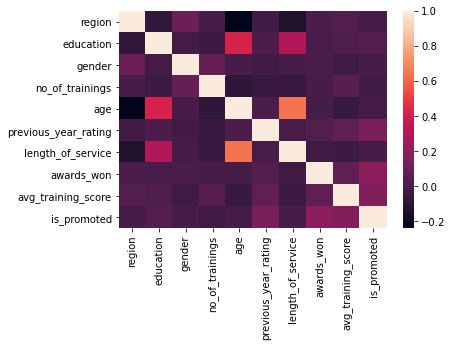

In [35]:
# heatmap correlation excluding the one hot encoded columns
sns.heatmap(df_ohe.corr().iloc[1:11,1:11])

### Insights
- the following columns seem to have the highest relative correlation with is_promoted
    - education (to a lesser extent than the other 3)
    - previous_year_rating
    - awards_won
    - avg_training_score

<AxesSubplot:>

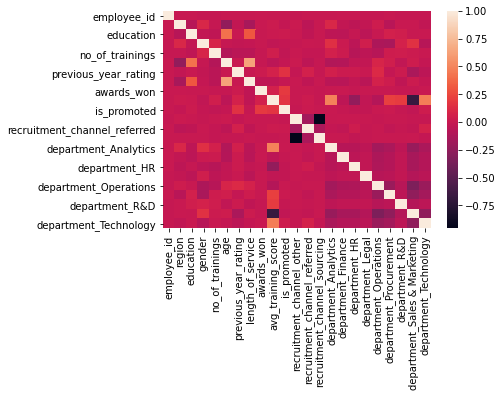

In [36]:
sns.heatmap(df_ohe.corr())

In [37]:
df_ohe.corr().round(3)

,employee_id,region,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,...,recruitment_channel_sourcing,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology
employee_id,1.000,0.003,0.004,-0.002,-0.004,0.000,0.004,-0.000,0.008,-0.000,...,0.004,0.000,0.007,0.009,-0.006,-0.002,0.005,-0.005,-0.003,-0.003
region,0.003,1.000,-0.076,0.104,-0.002,-0.239,-0.022,-0.141,0.008,0.023,...,0.000,0.105,-0.019,-0.041,-0.019,0.030,-0.070,0.014,0.009,-0.030
education,0.004,-0.076,1.000,-0.017,-0.038,0.419,0.010,0.305,0.000,0.016,...,-0.001,-0.043,-0.053,-0.007,-0.054,-0.001,0.060,0.050,0.005,0.012
gender,-0.002,0.104,-0.017,1.000,0.090,-0.002,-0.022,-0.012,0.003,-0.031,...,0.004,0.146,0.017,-0.054,0.049,-0.123,-0.134,0.073,0.152,-0.075
no_of_trainings,-0.004,-0.002,-0.038,0.090,1.000,-0.088,-0.059,-0.059,-0.008,0.048,...,-0.010,0.062,0.023,-0.077,-0.044,-0.078,0.031,0.037,0.028,0.007
age,0.000,-0.239,0.419,-0.002,-0.088,1.000,0.007,0.640,-0.007,-0.055,...,-0.003,-0.097,-0.092,-0.025,-0.022,0.083,0.047,-0.030,0.032,-0.013
previous_year_rating,0.004,-0.022,0.010,-0.022,-0.059,0.007,1.000,0.001,0.027,0.070,...,-0.005,0.055,0.028,0.024,0.006,0.120,-0.012,0.024,-0.129,-0.053
length_of_service,-0.000,-0.141,0.305,-0.012,-0.059,0.640,0.001,1.000,-0.032,-0.039,...,0.003,-0.060,-0.065,-0.024,-0.061,0.072,0.037,-0.035,0.026,-0.012
awards_won,0.008,0.008,0.000,0.003,-0.008,-0.007,0.027,-0.032,1.000,0.067,...,-0.007,0.002,0.007,-0.006,0.001,0.000,0.002,-0.001,-0.009,0.007
avg_training_score,-0.000,0.023,0.016,-0.031,0.048,-0.055,0.070,-0.039,0.067,1.000,...,-0.008,0.481,-0.040,-0.233,-0.029,-0.092,0.216,0.203,-0.671,0.472


### Insights
- Again, we see the same four columns having the highest correlation. 
    - education (to a lesser extent than the other 3)
    - previous_year_rating
    - awards_won
    - avg_training_score
- lowest correlation of these four is education with 0.025

In [224]:
# pull only the fields that have a correlation equal to or higher than 0.025, and only look at the is_promoted column
df_ohe.corr()[df_ohe.corr().round(3) >= 0.025].loc['is_promoted']

employee_id                          NaN
region                               NaN
education                       0.025438
gender                               NaN
no_of_trainings                      NaN
age                                  NaN
previous_year_rating            0.153118
length_of_service                    NaN
awards_won                      0.195451
avg_training_score              0.171362
is_promoted                     1.000000
recruitment_channel_other            NaN
recruitment_channel_referred         NaN
recruitment_channel_sourcing         NaN
department_Analytics                 NaN
department_Finance                   NaN
department_HR                        NaN
department_Legal                     NaN
department_Operations                NaN
department_Procurement               NaN
department_R&D                       NaN
department_Sales & Marketing         NaN
department_Technology           0.029687
Name: is_promoted, dtype: float64

In [39]:
# reference previous versions of the dataframe
version_dict

{0: 'df', 1: 'df_dna', 2: 'df_tcat', 3: 'df_ohe'}

<AxesSubplot:>

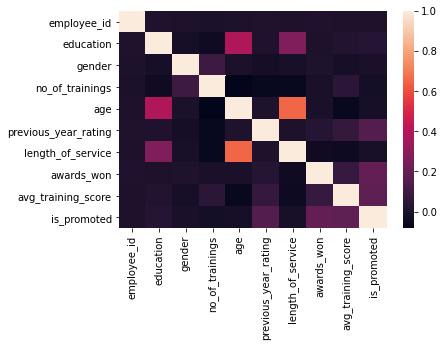

In [40]:
# correlataion heatmap of the df version: transform categorical
sns.heatmap(df_tcat.corr())

### Insights
- looking at the previous version of the dataframe, we see the same four columns have the highest relataive correlation with is_promoted

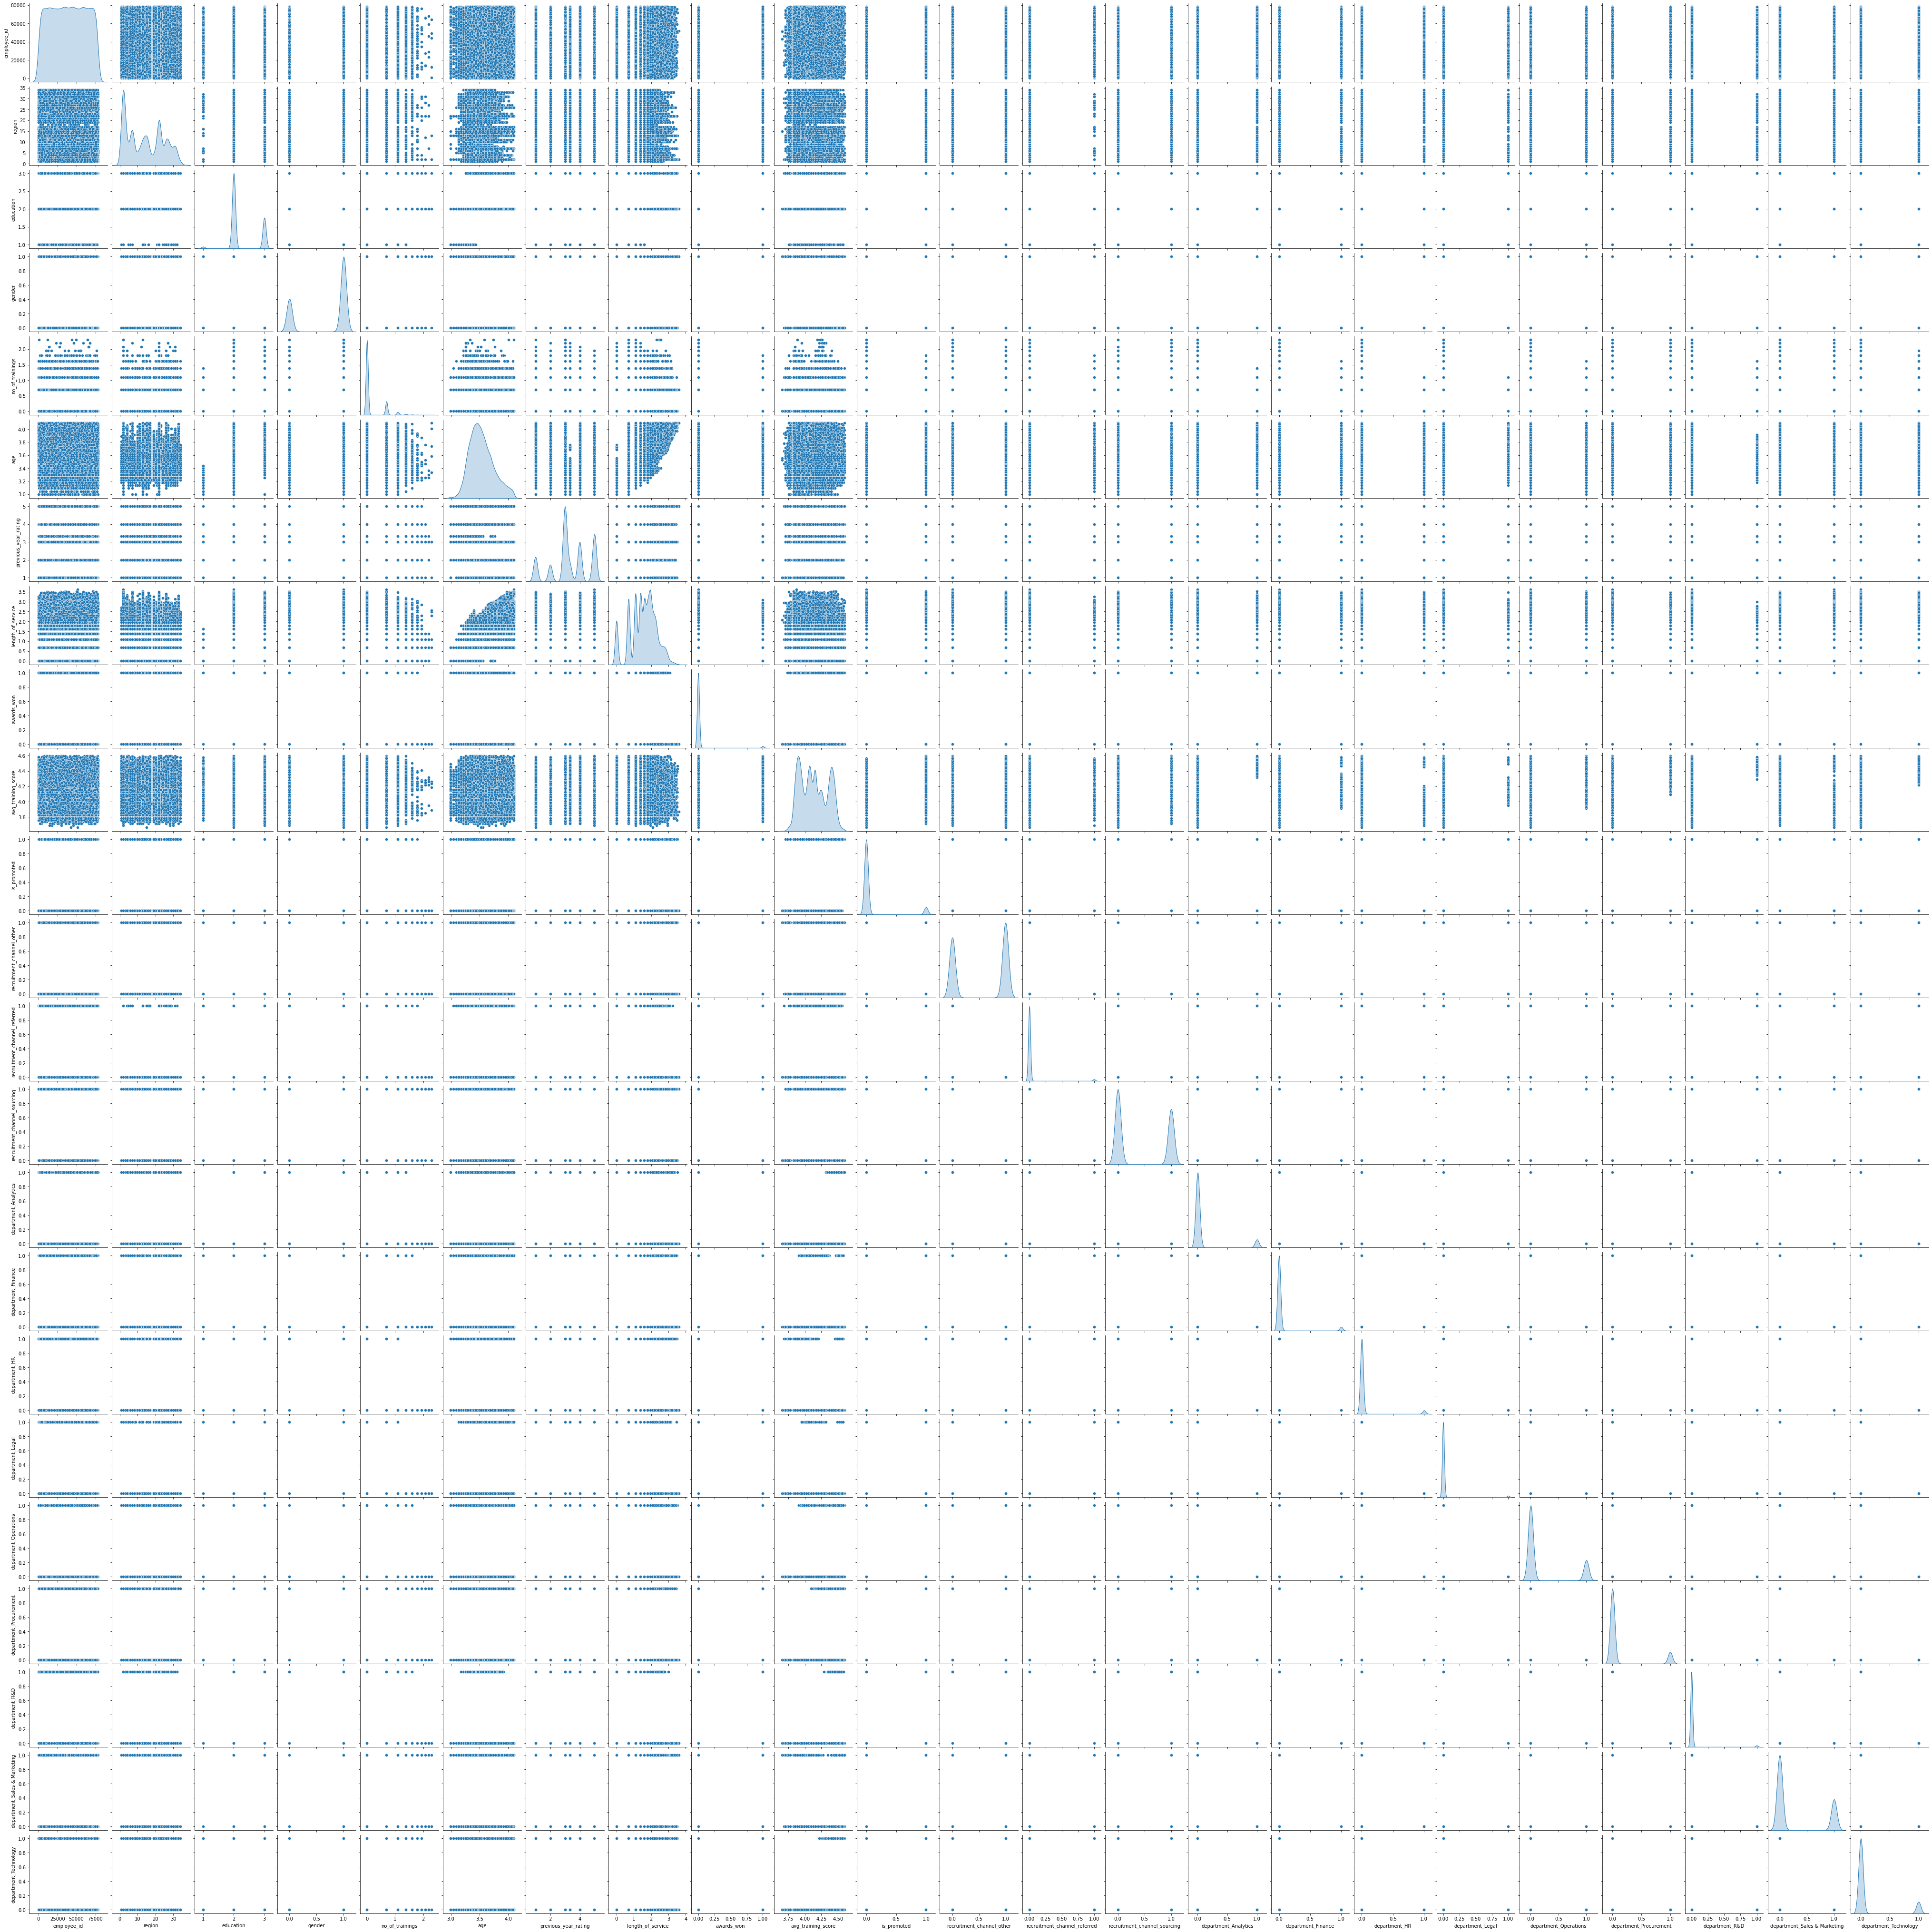

In [41]:
sns.pairplot(df_ohe, diag_kind='kde')

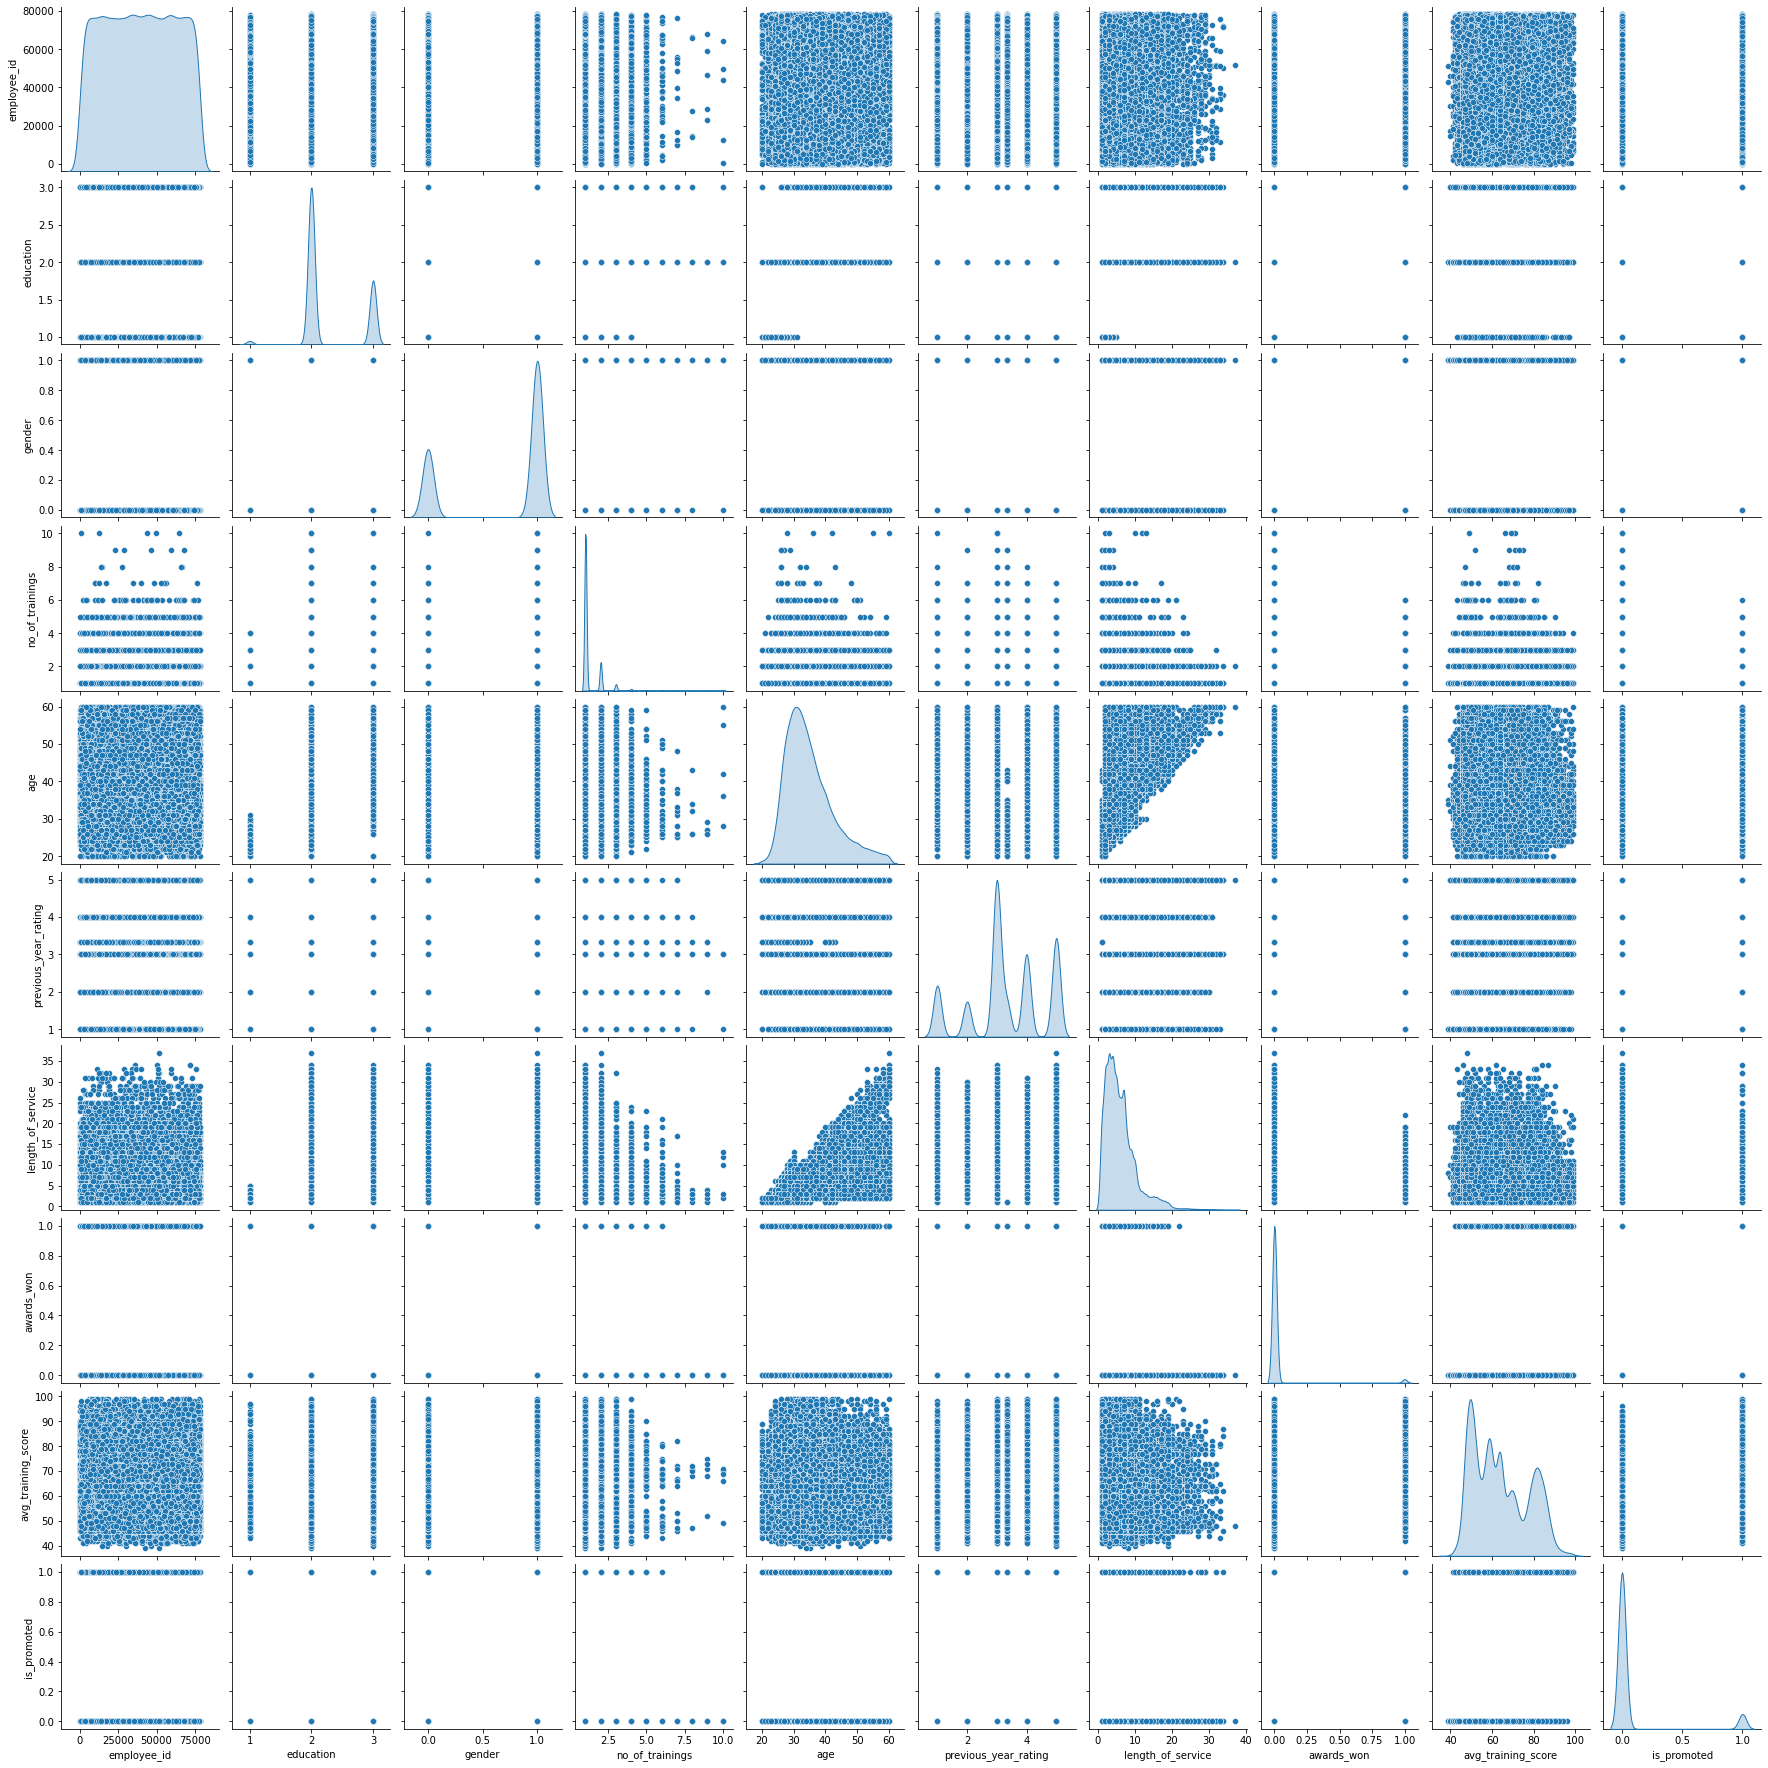

In [42]:
sns.pairplot(df_tcat, diag_kind='kde')

# Feature Engineering

In [100]:
# pull only the fields that have a correlation equal to or higher than 0, and only look at the is_promoted column
df_pc = pd.DataFrame(df_ohe.corr()['is_promoted'][df_ohe.corr()['is_promoted'] >= 0]) # add to new dataframe
df_pc = df_pc.drop(['employee_id','is_promoted'], axis='index') # remove employee id and is_promoted rows
df_pc # df positive correlation

,is_promoted
education,0.025438
previous_year_rating,0.153118
awards_won,0.195451
avg_training_score,0.171362
recruitment_channel_referred,0.018459
department_Analytics,0.011733
department_Operations,0.008470
department_Procurement,0.014683
department_Technology,0.029687


### Insights
- Above fields have a relatively good correlation (the best in comparison with the others) with being promoted

In [226]:
# create copy and new version: df feature engineering v04
df_feng = df_ohe.copy()
version_dict[4] = 'df_feng'
df_feng

,employee_id,region,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,...,recruitment_channel_sourcing,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology
0,65438,7,3,0,0.000000,3.555348,5.0,2.079442,0,3.891820,...,1,0,0,0,0,0,0,0,1,0
1,65141,22,2,1,0.000000,3.401197,5.0,1.386294,0,4.094345,...,0,0,0,0,0,1,0,0,0,0
2,7513,19,2,1,0.000000,3.526361,3.0,1.945910,0,3.912023,...,1,0,0,0,0,0,0,0,1,0
3,2542,23,2,1,0.693147,3.663562,1.0,2.302585,0,3.912023,...,0,0,0,0,0,0,0,0,1,0
4,48945,26,2,1,0.000000,3.806662,3.0,0.693147,0,4.290459,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54802,6915,14,2,1,0.693147,3.433987,1.0,0.693147,0,3.891820,...,0,0,0,0,0,0,0,0,1,0
54803,3030,14,2,1,0.000000,3.871201,3.0,2.833213,0,4.356709,...,1,0,0,0,0,0,0,0,0,1
54804,74592,27,3,0,0.000000,3.610918,2.0,1.791759,0,4.025352,...,0,0,0,0,0,1,0,0,0,0
54805,13918,1,2,1,0.000000,3.295837,5.0,1.098612,0,4.369448,...,0,1,0,0,0,0,0,0,0,0


In [227]:
df_feng['r_edu_age'] = df_feng['education'].values / df_feng['age'].values
df_feng['r_score_serv'] = df_feng['avg_training_score'].values / df_feng['length_of_service'].values
df_feng['r_serv_age'] =  df_feng['age'].values / df_feng['length_of_service'].values
df_feng['r_prevyear_score'] = df_feng['previous_year_rating'].values / df_feng['avg_training_score'].values

df_feng

<ipython-input-227-90caf8c8b4bf>:2: RuntimeWarning: divide by zero encountered in true_divide
  df_feng['r_score_serv'] = df_feng['avg_training_score'].values / df_feng['length_of_service'].values
<ipython-input-227-90caf8c8b4bf>:3: RuntimeWarning: divide by zero encountered in true_divide
  df_feng['r_serv_age'] =  df_feng['age'].values / df_feng['length_of_service'].values


,employee_id,region,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,...,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,r_edu_age,r_score_serv,r_serv_age,r_prevyear_score
0,65438,7,3,0,0.000000,3.555348,5.0,2.079442,0,3.891820,...,0,0,0,0,1,0,0.843799,1.871570,1.709761,1.284746
1,65141,22,2,1,0.000000,3.401197,5.0,1.386294,0,4.094345,...,0,1,0,0,0,0,0.588028,2.953445,2.453445,1.221197
2,7513,19,2,1,0.000000,3.526361,3.0,1.945910,0,3.912023,...,0,0,0,0,1,0,0.567157,2.010382,1.812191,0.766867
3,2542,23,2,1,0.693147,3.663562,1.0,2.302585,0,3.912023,...,0,0,0,0,1,0,0.545917,1.698970,1.591065,0.255622
4,48945,26,2,1,0.000000,3.806662,3.0,0.693147,0,4.290459,...,0,0,0,0,0,1,0.525395,6.189825,5.491853,0.699226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54802,6915,14,2,1,0.693147,3.433987,1.0,0.693147,0,3.891820,...,0,0,0,0,1,0,0.582413,5.614710,4.954196,0.256949
54803,3030,14,2,1,0.000000,3.871201,3.0,2.833213,0,4.356709,...,0,0,0,0,0,1,0.516636,1.537727,1.366364,0.688593
54804,74592,27,3,0,0.000000,3.610918,2.0,1.791759,0,4.025352,...,0,1,0,0,0,0,0.830814,2.246592,2.015292,0.496851
54805,13918,1,2,1,0.000000,3.295837,5.0,1.098612,0,4.369448,...,0,0,0,0,0,0,0.606826,3.977243,3.000000,1.144309


In [228]:
df_feng.corr()

,employee_id,region,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,...,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,r_edu_age,r_score_serv,r_serv_age,r_prevyear_score
employee_id,1.000000,0.003448,0.003816,-0.001940,-0.003732,0.000031,0.004309,-0.000043,0.007586,-0.000008,...,-0.006457,-0.002145,0.004760,-0.005463,-0.003372,-0.003194,0.004199,-0.004865,-0.004904,0.004269
region,0.003448,1.000000,-0.076109,0.104107,-0.002367,-0.238613,-0.022493,-0.140516,0.007803,0.023410,...,-0.018935,0.030050,-0.070046,0.013517,0.009061,-0.029905,-0.010340,0.104200,0.080951,-0.026181
education,0.003816,-0.076109,1.000000,-0.017288,-0.037741,0.418837,0.009864,0.305105,0.000495,0.015572,...,-0.054021,-0.000788,0.059840,0.049640,0.004625,0.011519,0.964094,-0.221883,-0.185208,0.007769
gender,-0.001940,0.104107,-0.017288,1.000000,0.089994,-0.001691,-0.022008,-0.011807,0.002721,-0.031485,...,0.049347,-0.122858,-0.133642,0.073239,0.152343,-0.074502,-0.017530,0.007864,0.011339,-0.018438
no_of_trainings,-0.003732,-0.002367,-0.037741,0.089994,1.000000,-0.087983,-0.059099,-0.059028,-0.007656,0.048231,...,-0.043668,-0.077603,0.031413,0.037365,0.027937,0.006601,-0.015791,0.054771,0.041618,-0.069209
age,0.000031,-0.238613,0.418837,-0.001691,-0.087983,1.000000,0.006646,0.640160,-0.007233,-0.054701,...,-0.022477,0.083489,0.047488,-0.029758,0.031521,-0.012510,0.168239,-0.484376,-0.386218,0.013585
previous_year_rating,0.004309,-0.022493,0.009864,-0.022008,-0.059099,0.006646,1.000000,0.000637,0.026890,0.069899,...,0.006490,0.120322,-0.011593,0.024000,-0.128653,-0.052704,0.008026,0.006005,-0.000967,0.990047
length_of_service,-0.000043,-0.140516,0.305105,-0.011807,-0.059028,0.640160,0.000637,1.000000,-0.032284,-0.039330,...,-0.061011,0.071555,0.036736,-0.035148,0.025760,-0.011799,0.149802,-0.902118,-0.897274,0.005349
awards_won,0.007586,0.007803,0.000495,0.002721,-0.007656,-0.007233,0.026890,-0.032284,1.000000,0.066593,...,0.000931,0.000410,0.002337,-0.001408,-0.008562,0.007038,0.002671,0.035513,0.030870,0.016408
avg_training_score,-0.000008,0.023410,0.015572,-0.031485,0.048231,-0.054701,0.069899,-0.039330,0.066593,1.000000,...,-0.029085,-0.092418,0.216256,0.203394,-0.670833,0.471735,0.031238,0.143253,0.031816,-0.062430


In [229]:
# pull only the fields that have a correlation equal to or higher than 0, and only look at the is_promoted column
df_fepc = pd.DataFrame(df_feng.corr()['is_promoted'][df_feng.corr()['is_promoted'] >= 0]) # add to new dataframe
df_fepc = df_fepc.drop(['employee_id','is_promoted'], axis='index') # remove employee id and is_promoted rows
df_fepc # df feature eng positive correlation

,is_promoted
education,0.025438
previous_year_rating,0.153118
awards_won,0.195451
avg_training_score,0.171362
recruitment_channel_referred,0.018459
department_Analytics,0.011733
department_Operations,0.008470
department_Procurement,0.014683
department_Technology,0.029687
r_edu_age,0.031281


### Insights
- The following new features have a positive correlation with being promoted
    - r_edu_age
    - r_score_serv	
    - r_prevyear_score
- r_serv_age had a negative correlation with being promoted

In [230]:
df_feng.describe()

,employee_id,region,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,...,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,r_edu_age,r_score_serv,r_serv_age,r_prevyear_score
count,52399.000000,52399.000000,52399.000000,52399.000000,52399.000000,52399.000000,52399.000000,52399.000000,52399.000000,52399.000000,...,52399.000000,52399.000000,52399.000000,52399.000000,52399.000000,52399.000000,52399.000000,5.239900e+04,5.239900e+04,52399.000000
mean,39184.187141,14.239184,2.269471,0.696158,0.156515,3.532928,3.337526,1.533522,0.023168,4.137473,...,0.019752,0.212256,0.134850,0.018531,0.291322,0.134335,0.641174,inf,inf,0.807561
std,22598.386766,10.057990,0.477060,0.459920,0.337045,0.205642,1.212211,0.731684,0.150439,0.202777,...,0.139149,0.408909,0.341566,0.134862,0.454376,0.341015,0.122845,NaN,NaN,0.295311
min,1.000000,1.000000,1.000000,0.000000,0.000000,2.995732,1.000000,0.000000,0.000000,3.663562,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.291207,1.072082e+00,1.133879e+00,0.218104
25%,19651.500000,4.000000,2.000000,0.000000,0.000000,3.367296,3.000000,1.098612,0.000000,3.951244,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.567157,2.020559e+00,1.761801e+00,0.684615
50%,39207.000000,13.000000,2.000000,1.000000,0.000000,3.496508,3.000000,1.609438,0.000000,4.127134,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.593948,2.583620e+00,2.172502e+00,0.766867
75%,58738.500000,22.000000,3.000000,1.000000,0.000000,3.663562,4.000000,2.079442,0.000000,4.330733,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.770848,3.799691e+00,3.182658e+00,1.017339
max,78298.000000,34.000000,3.000000,1.000000,2.302585,4.094345,5.000000,3.610918,1.000000,4.595120,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.001425,inf,inf,1.355425


### Insights
- r_score_serv & r_serv_age both have infinite in max and mean. removing columns. 

In [235]:
df_feng.drop(['r_score_serv', 'r_serv_age'], axis = 1, inplace=True)
df_feng.describe()

,employee_id,region,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,...,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,r_edu_age,r_prevyear_score
count,52399.000000,52399.000000,52399.000000,52399.000000,52399.000000,52399.000000,52399.000000,52399.000000,52399.000000,52399.000000,...,52399.000000,52399.000000,52399.000000,52399.000000,52399.000000,52399.000000,52399.000000,52399.000000,52399.000000,52399.000000
mean,39184.187141,14.239184,2.269471,0.696158,0.156515,3.532928,3.337526,1.533522,0.023168,4.137473,...,0.047711,0.045535,0.019752,0.212256,0.134850,0.018531,0.291322,0.134335,0.641174,0.807561
std,22598.386766,10.057990,0.477060,0.459920,0.337045,0.205642,1.212211,0.731684,0.150439,0.202777,...,0.213156,0.208477,0.139149,0.408909,0.341566,0.134862,0.454376,0.341015,0.122845,0.295311
min,1.000000,1.000000,1.000000,0.000000,0.000000,2.995732,1.000000,0.000000,0.000000,3.663562,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.291207,0.218104
25%,19651.500000,4.000000,2.000000,0.000000,0.000000,3.367296,3.000000,1.098612,0.000000,3.951244,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.567157,0.684615
50%,39207.000000,13.000000,2.000000,1.000000,0.000000,3.496508,3.000000,1.609438,0.000000,4.127134,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.593948,0.766867
75%,58738.500000,22.000000,3.000000,1.000000,0.000000,3.663562,4.000000,2.079442,0.000000,4.330733,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.770848,1.017339
max,78298.000000,34.000000,3.000000,1.000000,2.302585,4.094345,5.000000,3.610918,1.000000,4.595120,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.001425,1.355425


In [225]:
# pull only the fields that have a negative correlation equal to or lower than 0, and only look at the is_promoted column
df_nc = pd.DataFrame(df_ohe.corr()['is_promoted'][df_ohe.corr()['is_promoted'] <= 0]) # add to new dataframe
df_nc # df positive correlation

,is_promoted
region,-0.011738
gender,-0.010575
no_of_trainings,-0.024425
age,-0.015876
length_of_service,-0.007650
recruitment_channel_other,-0.005355
recruitment_channel_sourcing,-0.000050
department_Finance,-0.003465
department_HR,-0.023417
department_Legal,-0.017928


In [240]:
df_feng.drop(['region', 'gender', 'no_of_trainings', 'age', 'length_of_service',
       'recruitment_channel_other', 'recruitment_channel_sourcing',
       'department_Finance', 'department_HR', 'department_Legal',
       'department_R&D', 'department_Sales & Marketing'], axis=1, inplace=True)
df_feng

,employee_id,education,previous_year_rating,awards_won,avg_training_score,is_promoted,recruitment_channel_referred,department_Analytics,department_Operations,department_Procurement,department_Technology,r_edu_age,r_prevyear_score
0,65438,3,5.0,0,3.891820,0,0,0,0,0,0,0.843799,1.284746
1,65141,2,5.0,0,4.094345,0,0,0,1,0,0,0.588028,1.221197
2,7513,2,3.0,0,3.912023,0,0,0,0,0,0,0.567157,0.766867
3,2542,2,1.0,0,3.912023,0,0,0,0,0,0,0.545917,0.255622
4,48945,2,3.0,0,4.290459,0,0,0,0,0,1,0.525395,0.699226
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54802,6915,2,1.0,0,3.891820,0,0,0,0,0,0,0.582413,0.256949
54803,3030,2,3.0,0,4.356709,0,0,0,0,0,1,0.516636,0.688593
54804,74592,3,2.0,0,4.025352,0,0,0,1,0,0,0.830814,0.496851
54805,13918,2,5.0,0,4.369448,0,0,1,0,0,0,0.606826,1.144309


# Models

In [241]:
X = df_feng.drop(['is_promoted'], axis = 1)
y = df_feng['is_promoted']

In [242]:
X_train, X_validation, y_train, y_validation = train_test_split(X, y , test_size=0.3, random_state=88)

In [243]:
k =  KFold(random_state=88, n_splits=5, shuffle=True)

In [244]:
algo= []
cv_r2_mean = []
cv_r2_std = []
cv_rmse_mean = []

### Linear Regression

In [246]:
pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('reg', LinearRegression())
])

pipeline.fit(X,y)
algo.append('Linear Regression')

scores = cross_val_score(pipeline, X, y, cv=k)

cv_r2_mean.append(scores.mean())
cv_r2_std.append(scores.std())

cv_rmse_mean.append((-cross_val_score(pipeline, X, y, cv=k,scoring='neg_mean_squared_error').mean())**0.5)

### Decision Tree

In [247]:
model = DecisionTreeRegressor(random_state=88)

algo.append('Decision Tree')

scores = cross_val_score(model, X, y, cv=k)

cv_r2_mean.append(scores.mean())
cv_r2_std.append(scores.std())

cv_rmse_mean.append((-cross_val_score(model, X, y, cv=k,scoring='neg_mean_squared_error').mean())**0.5)

### Random Forest

In [248]:
model = RandomForestRegressor(random_state=88)

#model.fit(xtrain,ytrain)

algo.append('Random Forest')

scores = cross_val_score(model, X, y, cv=k)

cv_r2_mean.append(scores.mean())
cv_r2_std.append(scores.std())

cv_rmse_mean.append((-cross_val_score(model, X, y, cv=k, scoring='neg_mean_squared_error').mean())**0.5)

### AdaBoost

In [249]:
model = AdaBoostRegressor(random_state=88)

algo.append('AdaBoost')
scores = cross_val_score(model, X, y, cv=k)

cv_r2_mean.append(scores.mean())
cv_r2_std.append(scores.std())

cv_rmse_mean.append((-cross_val_score(model, X, y, cv=k,scoring='neg_mean_squared_error').mean())**0.5)

### Gradient Boosting

In [250]:
model = GradientBoostingRegressor(random_state=88)

algo.append('Gradient Boosting')

scores = cross_val_score(model, X, y, cv=k)

cv_r2_mean.append(scores.mean())
cv_r2_std.append(scores.std())

cv_rmse_mean.append((-cross_val_score(model, X, y, cv=k,scoring='neg_mean_squared_error').mean())**0.5)

In [251]:
results = pd.DataFrame()
results['Model'] = algo
results['CV R2 score mean'] = cv_r2_mean
results['CV R2 score std'] = cv_r2_std
results['CV RMSE'] = cv_rmse_mean
results = results.set_index('Model')
results

,CV R2 score mean,CV R2 score std,CV RMSE
Model,,,
Linear Regression,0.114667,0.007018,0.264857
Decision Tree,-0.529219,0.042597,0.348007
Random Forest,0.174600,0.010003,0.255729
AdaBoost,-0.007928,0.179463,0.282366
Gradient Boosting,0.242597,0.012367,0.244979


In [252]:
# removed features that were negatively correlated
# results02 = results.copy()
results02 

,CV R2 score mean,CV R2 score std,CV RMSE
Model,,,
Linear Regression,0.114667,0.007018,0.264857
Decision Tree,-0.529219,0.042597,0.348007
Random Forest,0.174600,0.010003,0.255729
AdaBoost,-0.007928,0.179463,0.282366
Gradient Boosting,0.242597,0.012367,0.244979


In [245]:
# initial run
# results01 = results.copy()
results01 

,CV R2 score mean,CV R2 score std,CV RMSE
Model,,,
Linear Regression,0.174710,0.005590,0.255717
Decision Tree,-0.499530,0.022689,0.344646
Random Forest,0.267541,0.005571,0.240901
AdaBoost,0.065075,0.152098,0.271905
Gradient Boosting,0.284001,0.008403,0.238192


# Hyper-parameter Tuning

In [259]:

rf = RandomForestRegressor(random_state=88, n_jobs=-1)

params = {
    'max_depth': [1,3,5,10,20,40,50,60],
    'min_samples_split': [10,50,100,500],
    'n_estimators': [10,25,100,200,500]
}    

grid = RandomizedSearchCV(rf, params, cv = k, n_jobs=-1, n_iter=30)

grid.fit(X,y)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=88, shuffle=True),
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=88),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'max_depth': [1, 3, 5, 10, 20, 40, 50,
                                                      60],
                                        'min_samples_split': [10, 50, 100, 500],
                                        'n_estimators': [10, 25, 100, 200,
                                                         500]})

In [266]:
grid.best_params_

{'n_estimators': 200, 'min_samples_split': 10, 'max_depth': 10}

In [260]:
grid_results = pd.DataFrame(grid.cv_results_)
grid_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,16.939270,0.117264,0.049058,0.011314,100,10,50,"{'n_estimators': 100, 'min_samples_split': 10,...",0.206666,0.227671,0.229960,0.207001,0.230785,0.220417,0.011138,11
1,0.954085,0.061131,0.013471,0.000135,25,100,3,"{'n_estimators': 25, 'min_samples_split': 100,...",0.132872,0.148209,0.149613,0.123968,0.146979,0.140328,0.010157,26
2,2.086960,0.086527,0.011339,0.000211,10,50,40,"{'n_estimators': 10, 'min_samples_split': 50, ...",0.221087,0.235295,0.237677,0.213034,0.242897,0.229998,0.011141,9
3,1.668671,0.101171,0.033927,0.002568,100,50,1,"{'n_estimators': 100, 'min_samples_split': 50,...",0.081351,0.100641,0.089318,0.086125,0.096505,0.090788,0.006967,28
4,20.840210,0.098424,0.176224,0.042031,500,10,3,"{'n_estimators': 500, 'min_samples_split': 10,...",0.134133,0.148188,0.150021,0.123739,0.148873,0.140991,0.010394,24
5,5.614264,0.258157,0.017990,0.000417,25,10,50,"{'n_estimators': 25, 'min_samples_split': 10, ...",0.194557,0.214273,0.212465,0.197246,0.221394,0.207987,0.010344,16
6,0.588905,0.031772,0.011295,0.000225,10,500,3,"{'n_estimators': 10, 'min_samples_split': 500,...",0.127310,0.141193,0.144098,0.114836,0.136729,0.132833,0.010643,27
7,1.493262,0.136291,0.011476,0.000206,10,50,10,"{'n_estimators': 10, 'min_samples_split': 50, ...",0.237565,0.243925,0.245422,0.221708,0.255508,0.240825,0.011157,7
8,24.715356,0.233873,0.071653,0.013266,200,10,10,"{'n_estimators': 200, 'min_samples_split': 10,...",0.241452,0.252884,0.262153,0.231601,0.255017,0.248621,0.010800,1
9,29.601928,0.279766,0.064092,0.004789,200,500,20,"{'n_estimators': 200, 'min_samples_split': 500...",0.204383,0.221838,0.225512,0.193555,0.217222,0.212502,0.011862,13


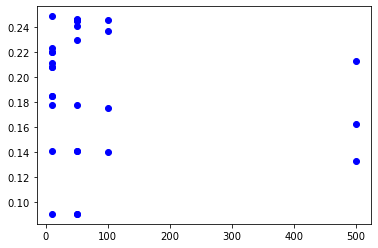

In [261]:
plt.plot(grid_results['param_min_samples_split'],
         grid_results['mean_test_score'],
        'bo')

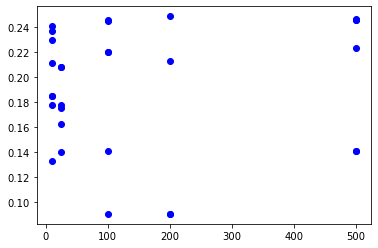

In [262]:
plt.plot(grid_results['param_n_estimators'],
         grid_results['mean_test_score'],
        'bo')

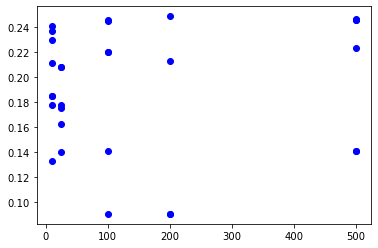

In [263]:
plt.plot(grid_results['param_n_estimators'],
         grid_results['mean_test_score'],
        'bo')

In [265]:
rf = RandomForestRegressor(random_state=88, n_jobs=-1)

params = {
    'max_depth': [13,15,17],
    'min_samples_split': [3,5,8],
    'n_estimators': [150,200,250]
}    

grid_search = GridSearchCV(rf, params, cv = k, n_jobs=-1)

grid_search.fit(X,y)


GridSearchCV(cv=KFold(n_splits=5, random_state=88, shuffle=True),
             estimator=RandomForestRegressor(n_jobs=-1, random_state=88),
             n_jobs=-1,
             param_grid={'max_depth': [13, 15, 17],
                         'min_samples_split': [3, 5, 8],
                         'n_estimators': [150, 200, 250]})

In [ ]:
rs = RandomizedSearchCV(estimator=GradientBoostingRegressor(random_state=42), param_distributions=params, 
                 return_train_score= True, n_jobs=-1, verbose=2, cv = 10, n_iter=500)
rs.fit(X_train, y_train)

/Users/ivansaucedo/opt/anaconda3/envs/aiml/lib/python3.8/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 27 is smaller than n_iter=500. Running 27 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 10 folds for each of 27 candidates, totalling 270 fits


In [270]:
grid_search.best_score_

0.2544053621210665

In [269]:
grid_search.best_params_

{'max_depth': 13, 'min_samples_split': 8, 'n_estimators': 250}